### Using Python (and R) for Finance 

**Sanjiv R Das**

It turns out that Python has become the de facto language for most of FinTech, and I believe it is necessary--indeed critical--for students to get some exposure to it. As an analogy, Python is as essential to FinTech as Excel is to Accounting. There are several cases in FinTech where analysis will require more than Excel. Such as:

- Programming the blockchain. 
- Extracting data for portfolio management. 
- Portfolio optimization.
- Robo-advising.
- Text mining for asset management. 
- Automated credit analysis using Machine Learning. 
- Crowd-sourcing trading algorithms. 
- Applying AI to financial problems. 

And much more. 

- https://stxnext.com/blog/2017/09/19/why-python-should-be-technology-choice-your-fintech/
- https://www.cleveroad.com/blog/see-why-python-is-the-best-programming-language-for-fintech-software

### Installing Python

In this notebook we will get started with using Python for financial computation. You first need to download and install IPython which is an entire system for interactive use of Python. Luckily, this is easily done by visiting the following URL and downloading the version applicable to your machine (Python runs on all platforms). 

Visit Continuum Analytics and download Python: http://continuum.io/downloads and install it. Test that it works by using the Launcher (which will be on your desktop) to start up the IPython Notebook. Use the latest version of Python. 



Particularly useful are linear algebra capabilities in Python and R. In Python the package numPy makes these facile. Also useful are graphical libraries, and in Python, these comes in the matplotlib package. 

In [1]:
#Invoke numPy and matplotlib in one command
#This is needed to bring all the math libraries into memory for immediate use.
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Using R

*Not essential*:  
You may also install the R programming language, which is a very useful tool for Machine Learning. 
See: http://en.wikipedia.org/wiki/Machine_learning
Get R from: http://www.r-project.org/ (download and install it). 

In order to allow Python to interface with R, you also need to install the "rpy2" package from: http://rpy.sourceforge.net/
While you do not need to use R, and can get by mostly with Python, it is also a useful language as there are heaps of finance packages in R. As you will see, we can run both within the IPython Notebook. (Indeed, these lecture notes have been prepared in the Notebook.)

If you want to use R in IDE mode, download RStudio: http://www.rstudio.com/

In [3]:
#IMPORTING STOCK DATA USING THE PANDAS MODULE
#Install the pandas_datareader module using "pip install pandas-datareader"
#See: https://github.com/pydata/pandas-datareader

from datetime import datetime
import pandas_datareader.data as web
goog = web.DataReader("GOOG",  "yahoo", datetime(2015,4,1), datetime(2017,3,31))
#web.get_data_yahoo('GOOG')

stkp = goog["Adj Close"]
print(stkp.head())

Date
2015-04-01    539.590576
2015-04-02    532.599060
2015-04-06    533.827332
2015-04-07    534.080933
2015-04-08    538.645813
Name: Adj Close, dtype: float64


In [4]:
### Display the top of the data frame. 

goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,545.597534,548.123657,536.547363,539.590576,539.590576,1952900
2015-04-02,537.889954,537.889954,530.925293,532.599060,532.599060,1716400
2015-04-06,529.307190,535.463318,526.671692,533.827332,533.827332,1324400
2015-04-07,535.135132,539.719910,533.066528,534.080933,534.080933,1302900
2015-04-08,535.433472,540.873535,535.433472,538.645813,538.645813,1178500


In [5]:
### Diaplay row names, i.e., dates. 

goog.index

DatetimeIndex(['2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

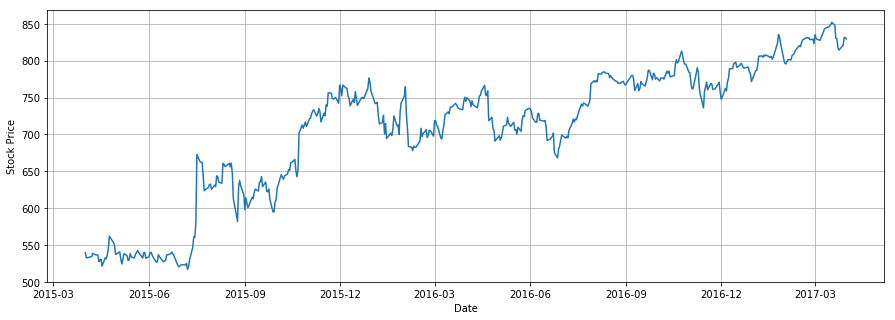

In [6]:
##PLOT THE STOCK PRICE OVER TIME
rcParams['figure.figsize'] = 15,5

t = goog.index
plot(t,stkp)
xlabel("Date")
ylabel("Stock Price")
grid()

In [7]:
### Range is an array, not a matrix

for j in range(3):
    print(j)

0
1
2


504


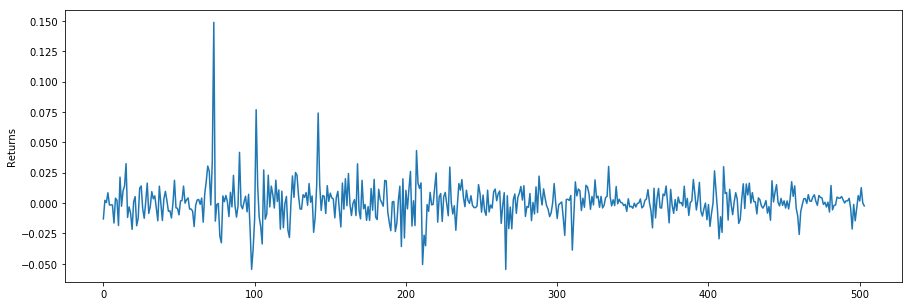

In [8]:
### PLOT RETURNS (contunuously compounded)

n = len(t)-1
print(n)
rets = zeros(n)
for j in range(n):
    rets[j] = log(stkp[j+1]/stkp[j])
plot(rets)
ylabel("Returns")

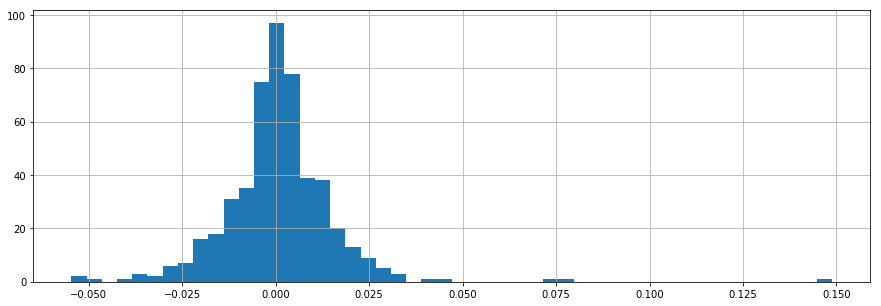

In [9]:
### Examine the distribution of returns visually using a histogram.

hist(rets,50)
grid()

In [10]:
### Summary Statistics

goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,707.437575,712.887824,701.447833,707.344376,707.344376,1.889149e+06
std,90.115218,90.041037,90.148388,90.134753,90.134753,1.005591e+06
min,519.500000,522.734009,515.179993,516.830017,516.830017,5.272000e+05
25%,654.150024,659.854980,644.010010,651.159973,651.159973,1.302900e+06
50%,729.169983,734.710022,721.900024,728.580017,728.580017,1.632700e+06
75%,773.780029,778.710022,768.530029,772.559998,772.559998,2.134100e+06
max,851.609985,853.500000,847.109985,852.119995,852.119995,1.116490e+07


In [11]:
### Calculate the Higher-Order Moments

import scipy.stats as ss
print("Skewness = ",ss.skew(rets))
print("Kurtosis = ",ss.kurtosis(rets))

#CHECK IF THIS IS EXCESS KURTOSIS or PLAIN KURTOSIS
x = randn(1000000)
print("Kurtosis for standard normal = ",ss.kurtosis(x))

Skewness =  2.034116828881684
Kurtosis =  20.6770262811951
Kurtosis for standard normal =  -0.005321846922111906


### Sharing variables between Python and R

In [12]:
#SENDING DATA VARIABLES TO R
%load_ext rpy2.ipython
#THIS ALLOWS US TO USE R INSIDE THE NOTEBOOK

In [13]:
#SENDS DATA FROM PYTHON TO R
%Rpush stkp       

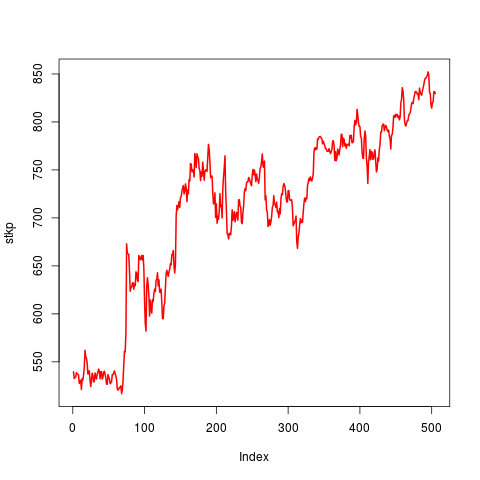

In [14]:
### Using R inside the Python notebook

#PREFIX NEEDED TO CALL R INSTEAD OF PYTHON
%R plot(stkp,type="l",col="red",lwd=2)   

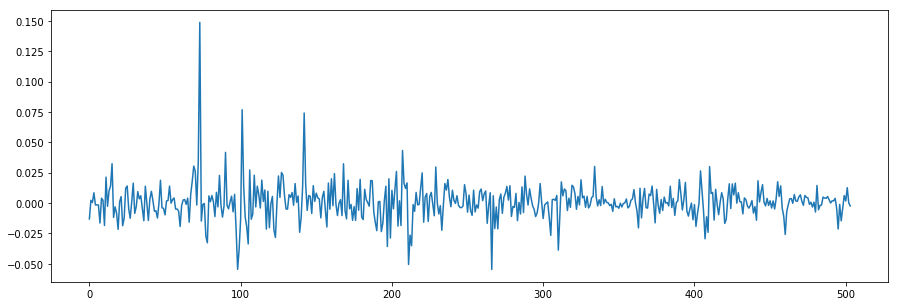

In [15]:
#GETTING DATA BACK FROM R TO PYTHON

%R ret = diff(log(stkp))
#GET DATA BACK FROM R TO PYTHON
ret = %Rget ret   
plot(ret)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0546448 -0.0050991  0.0004559  0.0008533  0.0071083  0.1488719 


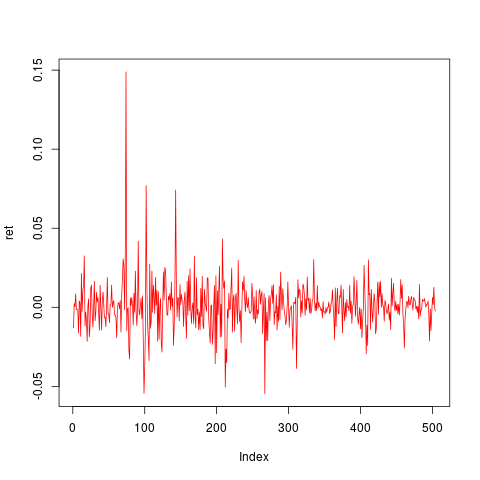

In [16]:
### Examine the data in the R namespace

%R print(summary(ret))
%R plot(ret,type="l",col="red")

### Getting stock data from R into Python

In [20]:
%%R
library(quantmod)
getSymbols(c("C","AAPL","CSCO","MSFT","IBM"))

[1] "C"    "AAPL" "CSCO" "MSFT" "IBM" 


In [24]:
%%R 
### The entire code block is R

citi = as.matrix(C$C.Adjusted)
aapl = as.matrix(AAPL$AAPL.Adjusted)
csco = as.matrix(CSCO$CSCO.Adjusted)
msft = as.matrix(MSFT$MSFT.Adjusted)
ibm = as.matrix(IBM$IBM.Adjusted)

In [25]:
%%R 
stkdata = data.frame(cbind(citi,aapl,csco,msft,ibm))
rn = rownames(stkdata)
head(stkdata)

           C.Adjusted AAPL.Adjusted CSCO.Adjusted MSFT.Adjusted IBM.Adjusted
2007-01-03   484.6483      10.73159      22.74110      22.96563     75.42905
2007-01-04   482.9817      10.96978      23.33976      22.92717     76.23550
2007-01-05   480.4378      10.89166      23.34796      22.79642     75.54537
2007-01-08   482.8940      10.94545      23.47917      23.01947     76.69302
2007-01-09   478.6835      11.85469      23.34796      23.04254     77.60034
2007-01-10   474.8238      12.42201      23.52018      22.81180     76.68530


In [26]:
### Now bring this data frame from R back into Python

stkdata = %Rget stkdata
rn = %Rget rn

In [27]:
stkdata.head()

,C.Adjusted,AAPL.Adjusted,CSCO.Adjusted,MSFT.Adjusted,IBM.Adjusted
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342


In [28]:
rn

array(['2007-01-03', '2007-01-04', '2007-01-05', ..., '2018-01-19',
       '2018-01-22', '2018-01-23'], dtype='<U10')

### Pandas is Awesome

This is a useful book to have: 
http://www3.canisius.edu/~yany/python/Python4DataAnalysis.pdf

In [29]:
import pandas as pd
stk = pd.DataFrame(stkdata)
#stk = stk.T
stk.head()

,C.Adjusted,AAPL.Adjusted,CSCO.Adjusted,MSFT.Adjusted,IBM.Adjusted
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342


In [30]:
### RENAME COLUMNS OF A DATAFRAME

stk.columns=["C","AAPL","CSCO","MSFT","IBM"]
stk.index = rn
stk.head()

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342


In [31]:
### PULL ONE ROW 

stk.ix['2007-01-03']

/home/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


C       484.648285
AAPL     10.731588
CSCO     22.741095
MSFT     22.965631
IBM      75.429054
Name: 2007-01-03, dtype: float64

In [32]:
stk.ix['2007-01-03']["AAPL"]

10.731588

In [33]:
### ADD A COLUMN TO THE DATAFRAME

stk["extra"] = 1.0
stk.head()

,C,AAPL,CSCO,MSFT,IBM,extra
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054,1.0
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504,1.0
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372,1.0
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024,1.0
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342,1.0


In [34]:
### Extract a column and sort it 

sort(stk["AAPL"])

array([ 10.014443,  10.307706,  10.543339, ..., 178.460007, 179.100006,
       179.259995])

In [35]:
stk.head()

,C,AAPL,CSCO,MSFT,IBM,extra
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054,1.0
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504,1.0
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372,1.0
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024,1.0
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342,1.0


In [36]:
### HOW TO REMOVE A COLUMN FROM THE DATAFRAME

stk = stk.drop("extra",axis=1)  #IF AXIS=0 (default), THEN ROW IS DROPPED
stk.head()

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024
2007-01-09,478.683502,11.854692,23.347965,23.042538,77.600342


In [37]:
### SUBSET THE DATAFRAME

stk[["AAPL","IBM"]].head()

,AAPL,IBM
2007-01-03,10.731588,75.429054
2007-01-04,10.969785,76.235504
2007-01-05,10.891665,75.545372
2007-01-08,10.945451,76.693024
2007-01-09,11.854692,77.600342


In [38]:
### FILTER THE DATAFRAME

stk[stk["AAPL"]<11]

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,484.648285,10.731588,22.741095,22.965631,75.429054
2007-01-04,482.981689,10.969785,23.339764,22.927172,76.235504
2007-01-05,480.437775,10.891665,23.347965,22.796421,75.545372
2007-01-08,482.894012,10.945451,23.479174,23.019470,76.693024
2007-01-23,477.981781,10.974908,21.355150,23.642450,75.281708
2007-01-26,479.560730,10.933926,21.609375,23.534775,75.568619
2007-01-30,476.051910,10.955698,21.527363,23.442476,77.057503
2007-01-31,483.595795,10.978748,21.830803,23.734739,76.886925
2007-02-01,484.835846,10.851967,21.806194,23.504005,76.770576
2007-02-02,484.215820,10.853251,22.257248,23.219433,76.902420


In [39]:
### FILTER ON ONE COLUMN AND DISPLAY ANOTHER

stk[stk["AAPL"]<11]["IBM"]

2007-01-03    75.429054
2007-01-04    76.235504
2007-01-05    75.545372
2007-01-08    76.693024
2007-01-23    75.281708
2007-01-26    75.568619
2007-01-30    77.057503
2007-01-31    76.886925
2007-02-01    76.770576
2007-02-02    76.902420
2007-02-05    77.840721
2007-02-06    77.429726
2007-02-09    76.651939
2007-02-12    76.675270
2007-02-13    76.449684
2007-02-14    77.157501
2007-02-15    76.939735
2007-02-16    76.994148
2007-02-27    73.081848
2007-02-28    72.288460
2007-03-02    70.701790
2008-11-20    57.401588
2008-11-21    59.914005
2008-12-22    65.602966
2008-12-24    64.426758
2008-12-26    65.074890
2008-12-31    67.339249
2009-01-14    66.563133
2009-01-15    67.307243
2009-01-16    67.947342
2009-01-20    65.594948
2009-01-21    73.148232
2009-03-06    69.033005
2009-03-09    67.158546
Name: IBM, dtype: float64

In [40]:
### APPLY A CONDITION TO ALL CELLS

(stk < 50).head()

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,False,True,True,True,False
2007-01-04,False,True,True,True,False
2007-01-05,False,True,True,True,False
2007-01-08,False,True,True,True,False
2007-01-09,False,True,True,True,False


In [41]:
### COLUMN SUMS

sum(stk)

C       254603.211688
AAPL    184248.664319
CSCO     59374.026665
MSFT     94236.183181
IBM     366719.901010
dtype: float64

### Lambda Functions

In [42]:
### USING FUNCTIONS ON DATA FRAMES
f = lambda x: x.max() - x.min()
stk.apply(f)

C       484.016053
AAPL    169.245552
CSCO     30.930367
MSFT     79.789264
IBM     128.973153
dtype: float64

### Apply Methods in Pandas

In [43]:
def g(x):
    return pd.Series([x.mean(),x.std(),x.min(),x.max()], index=['mean','stdev','min','max'])
stk.apply(g)

,C,AAPL,CSCO,MSFT,IBM
mean,91.452303,66.181273,21.326877,33.849204,131.724102
stdev,115.994143,43.569095,5.766690,16.766570,33.377136
min,9.895263,10.014443,11.169631,12.110738,57.401588
max,493.911316,179.259995,42.099998,91.900002,186.374741


In [44]:
### SORT ON ROW INDEXES

print(stk.head())
stk.sort_index(axis=0,ascending=False).head()

                     C       AAPL       CSCO       MSFT        IBM
2007-01-03  484.648285  10.731588  22.741095  22.965631  75.429054
2007-01-04  482.981689  10.969785  23.339764  22.927172  76.235504
2007-01-05  480.437775  10.891665  23.347965  22.796421  75.545372
2007-01-08  482.894012  10.945451  23.479174  23.019470  76.693024
2007-01-09  478.683502  11.854692  23.347965  23.042538  77.600342


,C,AAPL,CSCO,MSFT,IBM
2018-01-23,78.550003,177.039993,42.099998,91.900002,166.250000
2018-01-22,78.589996,177.000000,41.660000,91.610001,162.600006
2018-01-19,78.300003,178.460007,41.290001,90.000000,162.369995
2018-01-18,77.389999,179.259995,41.299999,90.099998,169.119995
2018-01-17,77.470001,179.100006,41.200001,90.139999,168.649994


In [45]:
### SORT ON COLUMN HEADERS

print(stk.head())
stk.sort_index(axis=1,ascending=False).head()

                     C       AAPL       CSCO       MSFT        IBM
2007-01-03  484.648285  10.731588  22.741095  22.965631  75.429054
2007-01-04  482.981689  10.969785  23.339764  22.927172  76.235504
2007-01-05  480.437775  10.891665  23.347965  22.796421  75.545372
2007-01-08  482.894012  10.945451  23.479174  23.019470  76.693024
2007-01-09  478.683502  11.854692  23.347965  23.042538  77.600342


,MSFT,IBM,CSCO,C,AAPL
2007-01-03,22.965631,75.429054,22.741095,484.648285,10.731588
2007-01-04,22.927172,76.235504,23.339764,482.981689,10.969785
2007-01-05,22.796421,75.545372,23.347965,480.437775,10.891665
2007-01-08,23.019470,76.693024,23.479174,482.894012,10.945451
2007-01-09,23.042538,77.600342,23.347965,478.683502,11.854692


In [46]:
### SUM COLUMNS

stk.sum()

C       254603.211688
AAPL    184248.664319
CSCO     59374.026665
MSFT     94236.183181
IBM     366719.901010
dtype: float64

In [47]:
### AVERAGE OF COLUMNS

stk.mean()

C        91.452303
AAPL     66.181273
CSCO     21.326877
MSFT     33.849204
IBM     131.724102
dtype: float64

In [48]:
### FIRST DIFFERENCE THE DATA

stk.diff().head()

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-1.666596,0.238197,0.598669,-0.038459,0.806450
2007-01-05,-2.543914,-0.078120,0.008201,-0.130751,-0.690132
2007-01-08,2.456237,0.053786,0.131209,0.223049,1.147652
2007-01-09,-4.210510,0.909241,-0.131209,0.023068,0.907318


In [49]:
### COMPUTE PERCENTAGE DAILY RETURN

stk.pct_change().head()

,C,AAPL,CSCO,MSFT,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-0.003439,0.022196,0.026325,-0.001675,0.010692
2007-01-05,-0.005267,-0.007121,0.000351,-0.005703,-0.009053
2007-01-08,0.005112,0.004938,0.005620,0.009784,0.015192
2007-01-09,-0.008719,0.083070,-0.005588,0.001002,0.011831


### Annualize Return Mean and Standard Deviation 

In [50]:
### Annualize Mean
stk.pct_change().mean()*252.0

C       0.008574
AAPL    0.304500
CSCO    0.098403
MSFT    0.162785
IBM     0.095743
dtype: float64

In [51]:
### Annualize SD
stk.pct_change().std()*sqrt(252.0)

C       0.592332
AAPL    0.317508
CSCO    0.291561
MSFT    0.273376
IBM     0.219898
dtype: float64

In [52]:
### CORRELATION MATRIX

rets = stk.pct_change()
rets.corr()

,C,AAPL,CSCO,MSFT,IBM
C,1.000000,0.376057,0.461910,0.404598,0.432746
AAPL,0.376057,1.000000,0.479957,0.464894,0.458219
CSCO,0.461910,0.479957,1.000000,0.583646,0.558308
MSFT,0.404598,0.464894,0.583646,1.000000,0.528534
IBM,0.432746,0.458219,0.558308,0.528534,1.000000


In [53]:
rets.corrwith(rets.AAPL)

C       0.376057
AAPL    1.000000
CSCO    0.479957
MSFT    0.464894
IBM     0.458219
dtype: float64

In [54]:
### COVARIANCE MATRIX

rets.cov()

,C,AAPL,CSCO,MSFT,IBM
C,0.001392,0.000281,0.000317,0.000260,0.000224
AAPL,0.000281,0.000400,0.000176,0.000160,0.000127
CSCO,0.000317,0.000176,0.000337,0.000185,0.000142
MSFT,0.000260,0.000160,0.000185,0.000297,0.000126
IBM,0.000224,0.000127,0.000142,0.000126,0.000192


In [55]:
sqrt(diag(rets.cov())*252.0)

array([0.59233174, 0.31750826, 0.29156094, 0.2733764 , 0.21989784])

### Stacking up Data in Panels

In [56]:
from datetime import datetime
import pandas_datareader.data as web
panel = pd.Panel(dict((stock, web.DataReader(stock,"yahoo",datetime(2015,4,1),
                                             datetime(2017,3,31))) 
                      for stock in ['C','AAPL','CSCO','MSFT','IBM']))
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 505 (major_axis) x 6 (minor_axis)
Items axis: AAPL to MSFT
Major_axis axis: 2015-04-01 00:00:00 to 2017-03-31 00:00:00
Minor_axis axis: Open to Volume

In [57]:
### RE-ARRANGE DIMENSIONS

panel = panel.swapaxes('items','minor')
panel

/home/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 505 (major_axis) x 5 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2015-04-01 00:00:00 to 2017-03-31 00:00:00
Minor_axis axis: AAPL to MSFT

In [58]:
panel['Adj Close'].head()

,AAPL,C,CSCO,IBM,MSFT
Date,,,,,
2015-04-01,118.082253,50.277233,24.844120,143.946548,38.008038
2015-04-02,119.099136,50.510998,24.734716,145.094986,37.606670
2015-04-06,121.028358,50.277233,24.816769,146.532867,38.782757
2015-04-07,119.754898,50.179832,24.971762,146.559967,38.764088
2015-04-08,119.365242,50.540207,25.117636,146.361053,38.661415


In [59]:
### EXTRACT A SINGLE ELEMENT OF THE MIDDLE DIMENSION

panel.ix[:,'2015-04-06',:]

/home/srdas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Adj Close,Volume
AAPL,124.470001,127.510002,124.330002,127.349998,121.028358,37194000.0
C,51.160000,51.959999,50.980000,51.619999,50.277233,13250800.0
CSCO,26.959999,27.320000,26.840000,27.219999,24.816769,20004000.0
IBM,159.690002,162.800003,158.699997,162.039993,146.532867,3465700.0
MSFT,40.340000,41.779999,40.180000,41.549999,38.782757,39223700.0


### Reading Data from Files

In [61]:
import pandas as pd
data = pd.read_table("markowitzdata.txt")

In [62]:
data.head()

,%DATE,SUNW,MSFT,IBM,CSCO,AMZN,mktrf,smb,hml,rf
0,20010102,-0.087444,0.000000,-0.002206,-0.129085,-0.108434,-0.0345,-0.0037,0.0209,0.00026
1,20010103,0.297297,0.105187,0.115696,0.240150,0.265766,0.0527,0.0097,-0.0493,0.00026
2,20010104,-0.060606,0.010430,-0.015192,0.013616,-0.117438,-0.0121,0.0083,-0.0015,0.00026
3,20010105,-0.096774,0.014194,0.008719,-0.125373,-0.060484,-0.0291,0.0027,0.0242,0.00026
4,20010108,0.006696,-0.003817,-0.004654,-0.002133,0.025751,-0.0037,-0.0053,0.0129,0.00026


In [64]:
### ANOTHER EXAMPLE

gdata = pd.read_csv("goog.csv")

In [65]:
gdata.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-04-06,572.18,575.16,568.00,574.18,2668300,574.18
1,2011-04-05,581.08,581.49,565.68,569.09,6047500,569.09
2,2011-04-04,593.00,594.74,583.10,587.68,2054500,587.68
3,2011-04-01,588.76,595.19,588.76,591.80,2613200,591.80
4,2011-03-31,583.00,588.16,581.74,586.76,2029400,586.76


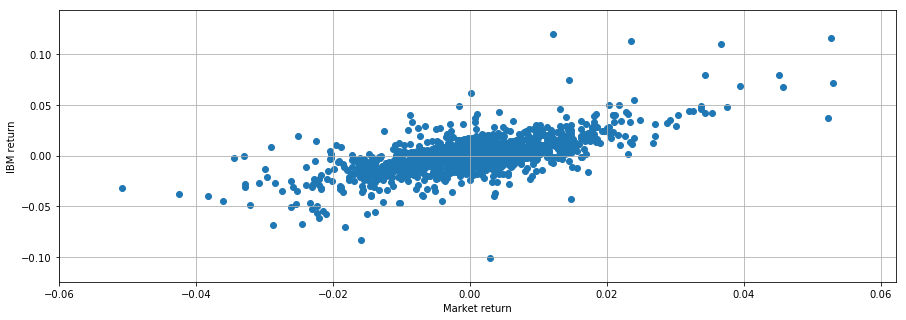

In [66]:
### HOW IS STOCK RETURN RELATED TO THAT OF THE MARKET?

scatter(data["mktrf"],data["IBM"])
xlabel("Market return")
ylabel("IBM return")
grid(True)

In [67]:
### RUN A REGRESSION AND EXTRACT THE COEFFICIENTS

from scipy import stats
y = data["IBM"]
x = data["mktrf"]
b, a, r_value, p_value, std_err = stats.linregress(x,y)
print("Intercept = ",a)
print("slope (beta) = ",b)

Intercept =  0.00011890050764975846
slope (beta) =  1.1091524051108552


### Bringing it all together

In [70]:
import pandas as pd
import pandas_datareader.data as web
aapl = web.DataReader('AAPL',data_source='yahoo',
                      start='1/1/2015',end='4/1/2017')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,103.494423,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,100.578819,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,100.588287,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,101.998764,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,105.917770,59364500


In [71]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-27,139.389999,141.220001,138.619995,140.880005,139.251511,23575100
2017-03-28,140.910004,144.039993,140.619995,143.800003,142.137741,33374800
2017-03-29,143.679993,144.490005,143.190002,144.119995,142.454041,29190000
2017-03-30,144.190002,144.500000,143.500000,143.929993,142.266235,21207300
2017-03-31,143.720001,144.270004,143.009995,143.660004,141.999374,19661700


### Returns and Volatility

In [72]:
aapl['cont_ret'] = log(aapl['Close']/aapl['Close'].shift(1))
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,cont_ret
Date,,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,103.494423,53204600,NaN
2015-01-05,108.290001,108.650002,105.410004,106.250000,100.578819,64285500,-0.028576
2015-01-06,106.540001,107.430000,104.629997,106.260002,100.588287,65797100,0.000094
2015-01-07,107.199997,108.199997,106.699997,107.750000,101.998764,40105900,0.013925
2015-01-08,109.230003,112.150002,108.699997,111.889999,105.917770,59364500,0.037703


In [73]:
aapl['Vols'] = pd.Series.rolling(aapl['cont_ret'],window=5).std()*sqrt(252.0)

aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,cont_ret,Vols
Date,,,,,,,,
2017-03-27,139.389999,141.220001,138.619995,140.880005,139.251511,23575100,0.001705,0.131608
2017-03-28,140.910004,144.039993,140.619995,143.800003,142.137741,33374800,0.020515,0.160824
2017-03-29,143.679993,144.490005,143.190002,144.119995,142.454041,29190000,0.002223,0.153433
2017-03-30,144.190002,144.500000,143.500000,143.929993,142.266235,21207300,-0.001319,0.147444
2017-03-31,143.720001,144.270004,143.009995,143.660004,141.999374,19661700,-0.001878,0.147150


In [74]:
### Note that you will lose a decent number of observations

aapl.head(10)

,Open,High,Low,Close,Adj Close,Volume,cont_ret,Vols
Date,,,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,103.494423,53204600,NaN,NaN
2015-01-05,108.290001,108.650002,105.410004,106.250000,100.578819,64285500,-0.028576,NaN
2015-01-06,106.540001,107.430000,104.629997,106.260002,100.588287,65797100,0.000094,NaN
2015-01-07,107.199997,108.199997,106.699997,107.750000,101.998764,40105900,0.013925,NaN
2015-01-08,109.230003,112.150002,108.699997,111.889999,105.917770,59364500,0.037703,NaN
2015-01-09,112.669998,113.250000,110.209999,112.010002,106.031380,53699500,0.001072,0.381965
2015-01-12,112.599998,112.629997,108.800003,109.250000,103.418694,49650800,-0.024949,0.362338
2015-01-13,111.430000,112.800003,108.910004,110.220001,104.336922,67091900,0.008840,0.359320
2015-01-14,109.040001,110.489998,108.500000,109.800003,103.939339,48337000,-0.003818,0.360841


In [75]:
### SUMMARY STATS WORKS DESPITE MISSING VALUES

aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,cont_ret,Vols
count,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02,565.000000,561.000000
mean,114.420336,115.398428,113.421148,114.446060,110.667193,4.318625e+07,0.000483,0.209848
std,12.292393,12.241119,12.324216,12.293932,11.887308,2.042829e+07,0.015288,0.125531
min,90.000000,91.669998,89.470001,90.339996,87.979477,1.147590e+07,-0.067965,0.022045
25%,106.625002,107.597502,105.432503,106.107498,103.078348,2.897558e+07,-0.006260,0.115807
50%,113.694999,114.669998,112.574997,113.635002,110.209125,3.766400e+07,0.000535,0.177400
75%,124.807499,125.755001,123.672497,124.695000,119.058744,5.121435e+07,0.008377,0.266747
max,144.190002,144.500000,143.500000,144.119995,142.454041,1.622063e+08,0.062940,0.736485


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d7d3c6198>,
      dtype=object)

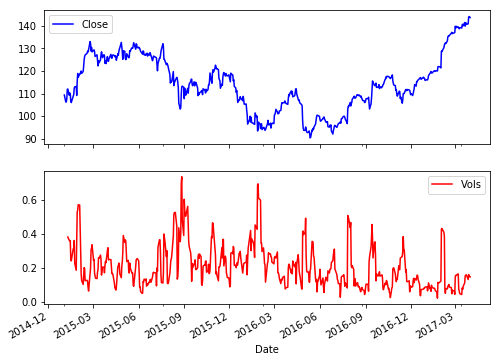

In [76]:
### PLOT PRICES AND VOLATILITIES

aapl[['Close','Vols']].plot(subplots=True,
                            color=('blue','red'),figsize=(8,6))

### Diversification of a Portfolio

It is useful to examine the power of using vector algebra with an application. Here we use vector and summation math to understand how diversification in stock portfolios works. Diversification occurs when we increase the number of non-perfectly correlated stocks in a portfolio, thereby reducing portfolio variance. In order to compute the variance of the portfolio we need to use the portfolio weights ${\bf w}$ and the covariance matrix of stock returns ${\bf R}$, denoted ${\bf \Sigma}$. We first write down the formula for a portfolio's return variance: 

\begin{equation}
Var({\bf w'R}) = {\bf w'\Sigma w} = \sum_{i=1}^n {\bf w_i^2 \sigma_i^2}
+ \sum_{i=1}^n \sum_{j=1,i \neq j}^n {\bf w_i w_j \sigma_{ij}}
\end{equation}

Readers are strongly encouraged to implement this by hand for $n=2$ to convince themselves that the vector form of the expression for variance ${\bf w'\Sigma w}$ is the same thing as the long form on the right-hand side of the equation above. 

### Independent Returns

If returns are independent, then the formula collapses to: 

\begin{equation}
Var(\bf{w'R}) = \bf{w'\Sigma w} = \sum_{i=1}^n {\bf w_i^2 \sigma_i^2}
\end{equation}

### Correlated returns

If returns are dependent, and equal amounts are invested in
each asset ($w_i=1/n,\;\;\forall i$):

\begin{eqnarray*}
Var(\bf{w'R}) &=&  \frac{1}{n}\sum_{i=1}^n \frac{\sigma_i^2}{n}
+ \frac{n-1}{n}\sum_{i=1}^n \sum_{j=1,i \neq j}^n  \frac{\sigma_{ij}}{n(n-1)}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \frac{n-1}{n} \bar{\sigma_{ij}}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \left(1 - \frac{1}{n} \right) \bar{\sigma_{ij}}
\end{eqnarray*}

### In the limit

The first term is the average variance, denoted $\bar{\sigma_1}^2$ divided by $n$, and the second is the average covariance, denoted $\bar{\sigma_{ij}}$ multiplied by factor $(n-1)/n$. As $n \rightarrow \infty$,

\begin{equation}
Var({\bf w'R}) = \bar{\sigma_{ij}}
\end{equation}

This produces the remarkable result that in a well diversified portfolio, the variances of each stock's return does not matter at all for portfolio risk! Further the risk of the portfolio, i.e., its variance, is nothing but the average of off-diagonal terms in the covariance matrix. 

### Insight from Diversification Math

In [77]:
sd=0.20; cv=0.01; m=100
n = range(1,m+1) 
sd_p = zeros(m)
for j in n:
    cv_mat = matrix(ones((j,j))*cv)
    fill_diagonal(cv_mat,sd**2)
    w = matrix(ones(j)*(1.0/j)).T
    sd_p[j-1] = sqrt((w.T).dot(cv_mat).dot(w))

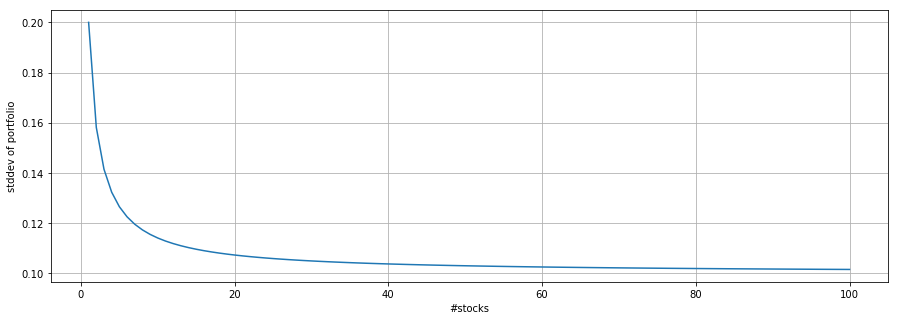

In [78]:
plot(n,sd_p)
xlabel('#stocks')
ylabel('stddev of portfolio')
grid()

### Arithmetic vs Geometric mean returns

The geometric mean is a good indicator of past performance, especially when we are interested in holding period returns. But if we are interested in expected future returns, the arithmetic mean is the relevant statistic.

Suppose a stock will rise by 30% or fall by 20% with equal probability. If it did one each in consecutive years then the geometric mean return is:

In [79]:
g_ret = ((1+0.30)*(1-0.20))**0.5-1
print("Geometric mean return = ", g_ret)

Geometric mean return =  0.01980390271855703


In [80]:
a_ret = 0.5*(0.30+(-0.20))
print("Arithmetic mean return per year = ",a_ret)

Arithmetic mean return per year =  0.04999999999999999


### Which one should you use?

Which one is more realistic in predicting future expected returns over the next two years? Note that there are 4 cases to consider for outcomes, all with equal probability $1/4$. 

In [81]:
ret = zeros(4)
ret[0] = (1+0.3)*(1+0.3)
ret[1] = (1+0.3)*(1-0.2)
ret[2] = (1-0.2)*(1+0.3)
ret[3] = (1-0.2)*(1-0.2)
two_year_return = 0.25*sum(ret)
print("Expected two year return = ", two_year_return-1)
print("Expected two year return (annualized) = ", two_year_return**0.5-1)

Expected two year return =  0.10250000000000004
Expected two year return (annualized) =  0.050000000000000044
